# Trabajo final de Metodogología de la investigación en Opinión Pública



En el siguiente informe, nuestro objetivo principal consiste en llevar a cabo un análisis de los resultados electorales de las elecciones generales de 2023. En este contexto, nos proponemos elaborar mapas que visualicen de manera clara los resultados obtenidos. Además, llevaremos a cabo un cruce de datos con la información recopilada del CENSO 2010, con el fin de enriquecer nuestro análisis y obtener una perspectiva más completa.

Una de las metas fundamentales de este trabajo es planificar una estrategia  que contribuya a mejorar la posición del candidato Sergio Massa. Para ello, nos basaremos en la información recabada a través de los mapas y la correlación de datos demográficos, identificando áreas de fortaleza y posibles oportunidades de crecimiento. Este enfoque estratégico nos permitirá desarrollar acciones específicas destinadas a optimizar la visibilidad y aceptación del candidato en los diferentes segmentos de la población.

In [1]:
!pip install geopandas  
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import numpy as np

En primer lugar, hacemos un lectura de los resultados electorales para poder trabajarlos. 

In [2]:
resultados =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")
resultados.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\4025785233.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  resultados =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")


año                           int64
eleccion_tipo                object
recuento_tipo                object
padron_tipo                  object
distrito_id                   int64
distrito_nombre              object
seccionprovincial_id          int64
seccionprovincial_nombre     object
seccion_id                    int64
seccion_nombre               object
circuito_id                  object
circuito_nombre              object
mesa_id                       int64
mesa_tipo                    object
mesa_electores                int64
cargo_id                      int64
cargo_nombre                 object
agrupacion_id                 int64
agrupacion_nombre            object
lista_numero                float64
lista_nombre                 object
votos_tipo                   object
votos_cantidad                int64
dtype: object

In [3]:
resultados.shape

(5868102, 23)

In [4]:
resultados.columns

Index(['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre',
       'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre',
       'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre',
       'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre',
       'votos_tipo', 'votos_cantidad'],
      dtype='object')

In [5]:
#para visualizaro los votos por agrupación y comuna aplicamos un filtro de CABA y el cargo que nos interesa
filtro = resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires") & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE")].reset_index() #reseteamos para restablecer el índice del df resultante 

total = filtro["votos_cantidad"].sum()
dfPartidos = filtro.groupby(["agrupacion_nombre","distrito_nombre"]
    ).agg(porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))
    ).reset_index()
filtroUxP= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["agrupacion_nombre"] == "UNION POR LA PATRIA")]

filtroUxP.groupby(["seccion_nombre","agrupacion_nombre"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()

,seccion_nombre,agrupacion_nombre,votos_total,porcentaje
0,Comuna 01,UNION POR LA PATRIA,38645,2.02
1,Comuna 02,UNION POR LA PATRIA,19225,1.01
2,Comuna 03,UNION POR LA PATRIA,38993,2.04
3,Comuna 04,UNION POR LA PATRIA,51401,2.69
4,Comuna 05,UNION POR LA PATRIA,42504,2.22
5,Comuna 06,UNION POR LA PATRIA,39230,2.05
6,Comuna 07,UNION POR LA PATRIA,44622,2.33
7,Comuna 08,UNION POR LA PATRIA,43136,2.26
8,Comuna 09,UNION POR LA PATRIA,39233,2.05
9,Comuna 10,UNION POR LA PATRIA,37457,1.96


In [6]:
print(filtroUxP.columns)

Index(['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre',
       'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre',
       'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre',
       'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre',
       'votos_tipo', 'votos_cantidad'],
      dtype='object')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\3603043545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtroUxP['porcentaje'] = (filtroUxP['votos_cantidad'] / total) * 100


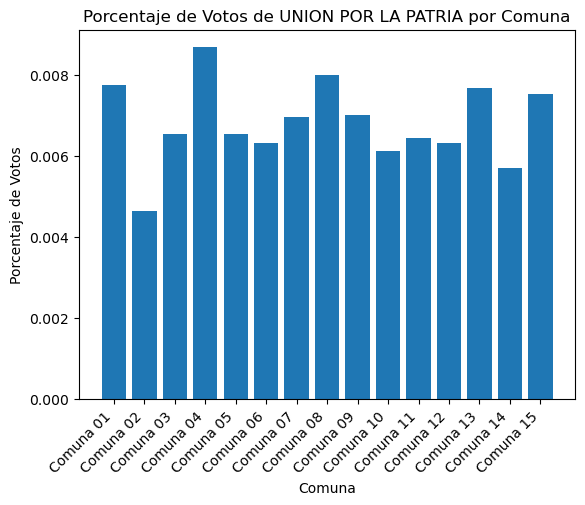

In [8]:
#No funcionaba si no filtraba los pocetaje por fuera
filtroUxP['porcentaje'] = (filtroUxP['votos_cantidad'] / total) * 100
plt.bar(filtroUxP["seccion_nombre"], filtroUxP["porcentaje"])

plt.xlabel("Comuna")
plt.ylabel("Porcentaje de Votos")
plt.title("Porcentaje de Votos de UNION POR LA PATRIA por Comuna")
plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para que se pueda leer
plt.show()

El partido Unión por la patria tuvo una mejor elección en la comuna 4 que incluye a los barrio de La boca, barracas y parque patricios. 

In [9]:
filtroJxc= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["agrupacion_nombre"] == "JUNTOS POR EL CAMBIO")]

filtroJxc.groupby(["seccion_nombre","agrupacion_nombre"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()

,seccion_nombre,agrupacion_nombre,votos_total,porcentaje
0,Comuna 01,JUNTOS POR EL CAMBIO,45975,2.41
1,Comuna 02,JUNTOS POR EL CAMBIO,57022,2.98
2,Comuna 03,JUNTOS POR EL CAMBIO,39075,2.04
3,Comuna 04,JUNTOS POR EL CAMBIO,39963,2.09
4,Comuna 05,JUNTOS POR EL CAMBIO,43259,2.26
5,Comuna 06,JUNTOS POR EL CAMBIO,54873,2.87
6,Comuna 07,JUNTOS POR EL CAMBIO,48420,2.53
7,Comuna 08,JUNTOS POR EL CAMBIO,26068,1.36
8,Comuna 09,JUNTOS POR EL CAMBIO,37413,1.96
9,Comuna 10,JUNTOS POR EL CAMBIO,41986,2.20


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\612259933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtroJxc['porcentaje'] = (filtroJxc['votos_cantidad'] / total) * 100


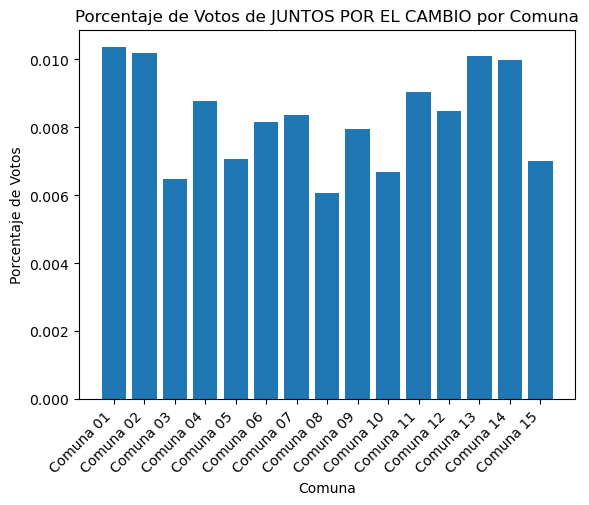

In [10]:
#No funcionaba si no filtraba los pocetaje por fuera
filtroJxc['porcentaje'] = (filtroJxc['votos_cantidad'] / total) * 100
plt.bar(filtroJxc["seccion_nombre"], filtroJxc["porcentaje"])

plt.xlabel("Comuna")
plt.ylabel("Porcentaje de Votos")
plt.title("Porcentaje de Votos de JUNTOS POR EL CAMBIO por Comuna")
plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para que se pueda leer
plt.show()

In [11]:
filtroLLA= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["agrupacion_nombre"] == "LA LIBERTAD AVANZA")]

filtroLLA.groupby(["seccion_nombre","agrupacion_nombre"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()

,seccion_nombre,agrupacion_nombre,votos_total,porcentaje
0,Comuna 01,LA LIBERTAD AVANZA,25657,1.34
1,Comuna 02,LA LIBERTAD AVANZA,17875,0.94
2,Comuna 03,LA LIBERTAD AVANZA,23562,1.23
3,Comuna 04,LA LIBERTAD AVANZA,29077,1.52
4,Comuna 05,LA LIBERTAD AVANZA,20595,1.08
5,Comuna 06,LA LIBERTAD AVANZA,20043,1.05
6,Comuna 07,LA LIBERTAD AVANZA,28137,1.47
7,Comuna 08,LA LIBERTAD AVANZA,27845,1.46
8,Comuna 09,LA LIBERTAD AVANZA,25544,1.34
9,Comuna 10,LA LIBERTAD AVANZA,23062,1.21


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\4262362529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtroLLA['porcentaje'] = (filtroLLA['votos_cantidad'] / total) * 100


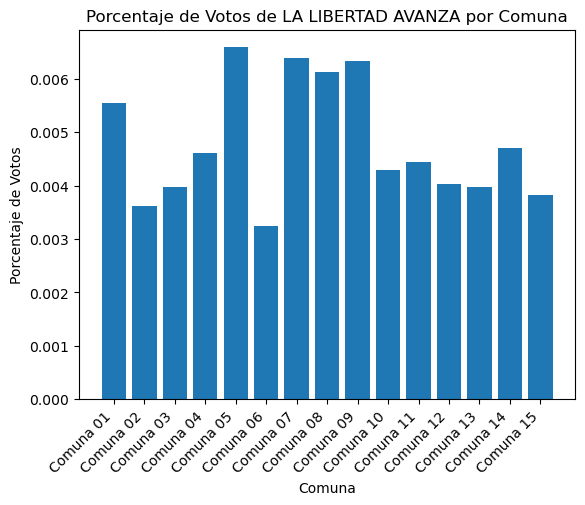

In [12]:
#No funcionaba si no filtraba los pocetaje por fuera
filtroLLA['porcentaje'] = (filtroLLA['votos_cantidad'] / total) * 100
plt.bar(filtroLLA["seccion_nombre"], filtroLLA["porcentaje"])

plt.xlabel("Comuna")
plt.ylabel("Porcentaje de Votos")
plt.title("Porcentaje de Votos de LA LIBERTAD AVANZA por Comuna")
plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para que se pueda leer
plt.show()

In [13]:
filtroFIT= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["agrupacion_nombre"] == "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD")]

filtroFIT.groupby(["seccion_nombre","agrupacion_nombre"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()

,seccion_nombre,agrupacion_nombre,votos_total,porcentaje
0,Comuna 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,3981,0.21
1,Comuna 02,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,1912,0.10
2,Comuna 03,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4571,0.24
3,Comuna 04,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5586,0.29
4,Comuna 05,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4814,0.25
5,Comuna 06,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4208,0.22
6,Comuna 07,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4863,0.25
7,Comuna 08,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4285,0.22
8,Comuna 09,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4578,0.24
9,Comuna 10,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4719,0.25


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\1281610177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtroFIT['porcentaje'] = (filtroFIT['votos_cantidad'] / total) * 100


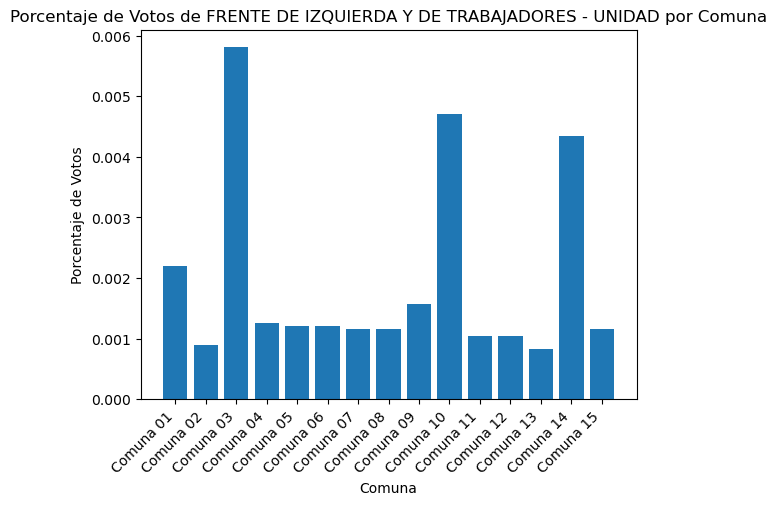

In [14]:
filtroFIT['porcentaje'] = (filtroFIT['votos_cantidad'] / total) * 100
plt.bar(filtroFIT["seccion_nombre"], filtroFIT["porcentaje"])

plt.xlabel("Comuna")
plt.ylabel("Porcentaje de Votos")
plt.title("Porcentaje de Votos de FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD por Comuna")
plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para que se pueda leer
plt.show()

In [15]:
filtroHXN= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["agrupacion_nombre"] == "HACEMOS POR NUESTRO PAIS")]

filtroHXN.groupby(["seccion_nombre","agrupacion_nombre"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()

,seccion_nombre,agrupacion_nombre,votos_total,porcentaje
0,Comuna 01,HACEMOS POR NUESTRO PAIS,3230,0.17
1,Comuna 02,HACEMOS POR NUESTRO PAIS,2250,0.12
2,Comuna 03,HACEMOS POR NUESTRO PAIS,3362,0.18
3,Comuna 04,HACEMOS POR NUESTRO PAIS,4211,0.22
4,Comuna 05,HACEMOS POR NUESTRO PAIS,3675,0.19
5,Comuna 06,HACEMOS POR NUESTRO PAIS,3698,0.19
6,Comuna 07,HACEMOS POR NUESTRO PAIS,4193,0.22
7,Comuna 08,HACEMOS POR NUESTRO PAIS,3238,0.17
8,Comuna 09,HACEMOS POR NUESTRO PAIS,4047,0.21
9,Comuna 10,HACEMOS POR NUESTRO PAIS,4164,0.22


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\3443457489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtroHXN['porcentaje'] = (filtroHXN['votos_cantidad'] / total) * 100


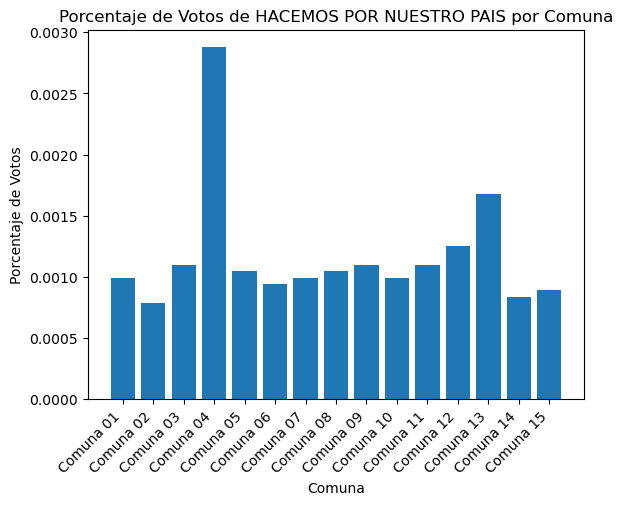

In [16]:
filtroHXN['porcentaje'] = (filtroHXN['votos_cantidad'] / total) * 100
plt.bar(filtroHXN["seccion_nombre"], filtroHXN["porcentaje"])

plt.xlabel("Comuna")
plt.ylabel("Porcentaje de Votos")
plt.title("Porcentaje de Votos de HACEMOS POR NUESTRO PAIS por Comuna")
plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para que se pueda leer
plt.show()

In [17]:
filtroENBLANCO= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["votos_tipo"] == "EN BLANCO")]

filtroENBLANCO.groupby(["seccion_nombre","votos_tipo"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()

,seccion_nombre,votos_tipo,votos_total,porcentaje
0,Comuna 01,EN BLANCO,2456,0.13
1,Comuna 02,EN BLANCO,1244,0.07
2,Comuna 03,EN BLANCO,1798,0.09
3,Comuna 04,EN BLANCO,2712,0.14
4,Comuna 05,EN BLANCO,1860,0.10
5,Comuna 06,EN BLANCO,1687,0.09
6,Comuna 07,EN BLANCO,2410,0.13
7,Comuna 08,EN BLANCO,3289,0.17
8,Comuna 09,EN BLANCO,2054,0.11
9,Comuna 10,EN BLANCO,1915,0.10


In [18]:
filtroENBLANCO.columns


Index(['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre',
       'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre',
       'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre',
       'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre',
       'votos_tipo', 'votos_cantidad'],
      dtype='object')

Graficamos los resultados en un grafico de barras. 

In [19]:
#Vamos a crear un filtro con datos de Caba y Presidente.
filtro = resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires") & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE")].reset_index()

#Guardamos en otro DF los votos de cada agrupacion en CABA y agregamos los porcentajes de votos
dfPartidos = filtro.groupby(["agrupacion_nombre","distrito_nombre"]
    ).agg(porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))
    ).reset_index()

votos_Blanco = filtro[filtro["votos_tipo"] == "EN BLANCO"]
porcentaje_en_blanco = round((votos_Blanco["votos_cantidad"].sum() * 100) / total, 2)

fila_en_blanco = {"agrupacion_nombre": "EN BLANCO", "distrito_nombre": "Ciudad Autónoma de Buenos Aires", "porcentaje": porcentaje_en_blanco}
df_en_blanco = pd.DataFrame([fila_en_blanco])

dfPartidos = pd.concat([dfPartidos, df_en_blanco], ignore_index=True)
dfPartidos


,agrupacion_nombre,distrito_nombre,porcentaje
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,Ciudad Autónoma de Buenos Aires,3.46
1,HACEMOS POR NUESTRO PAIS,Ciudad Autónoma de Buenos Aires,3.01
2,JUNTOS POR EL CAMBIO,Ciudad Autónoma de Buenos Aires,40.15
3,LA LIBERTAD AVANZA,Ciudad Autónoma de Buenos Aires,19.33
4,UNION POR LA PATRIA,Ciudad Autónoma de Buenos Aires,31.43
5,EN BLANCO,Ciudad Autónoma de Buenos Aires,1.69


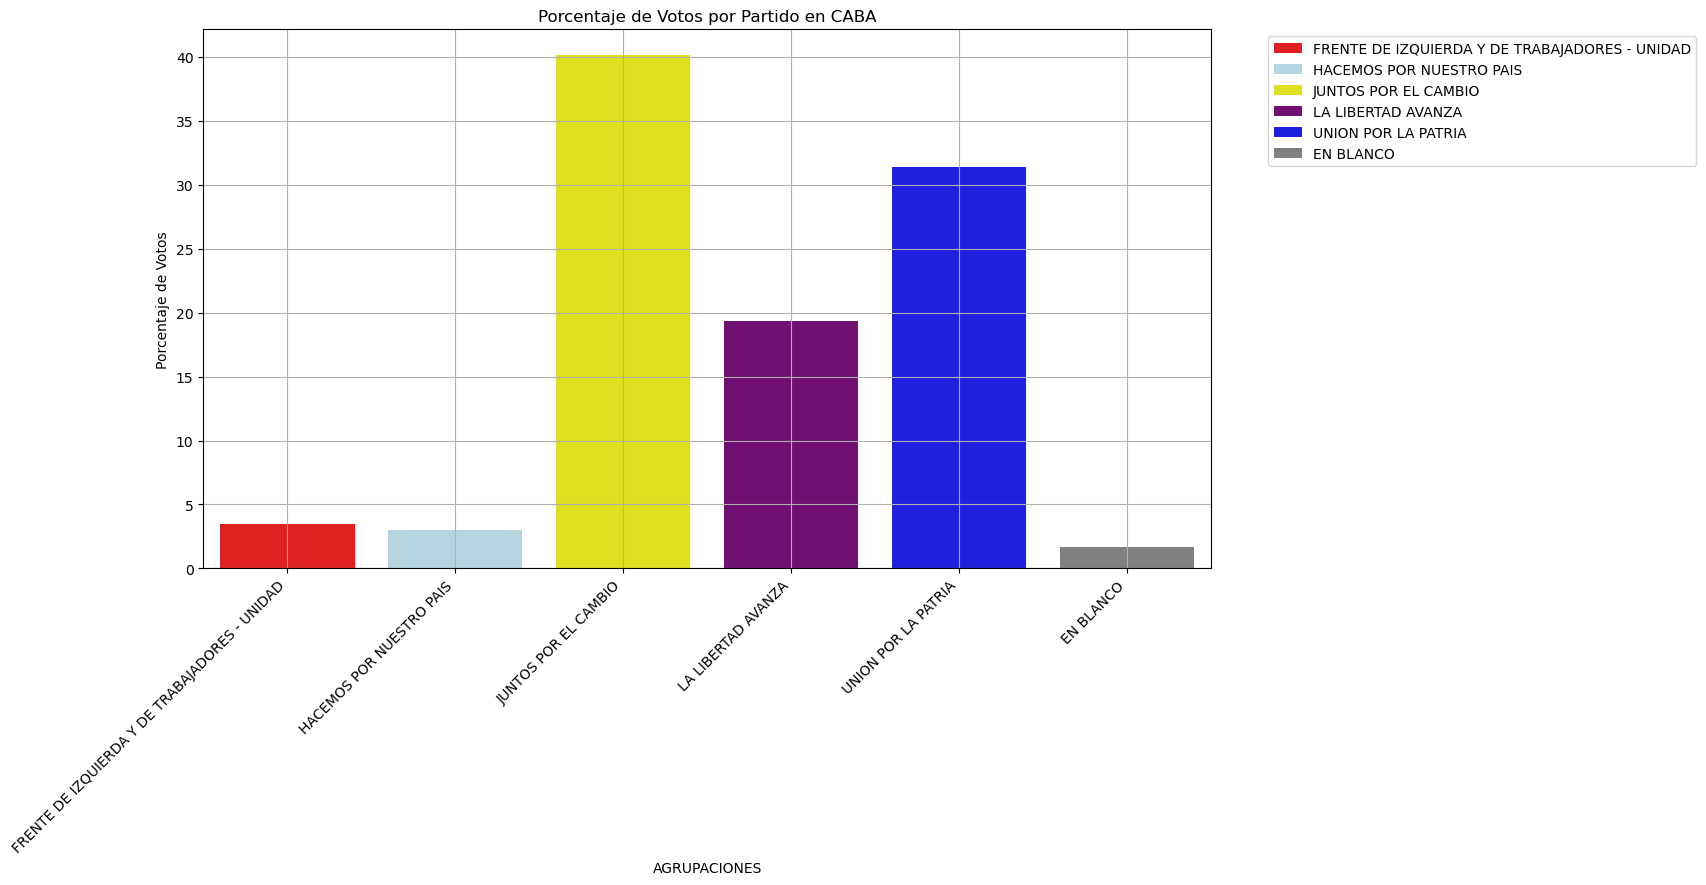

In [20]:
# Para respetar los colores de los partidos, defino por fuera los colores
colores = {'UNION POR LA PATRIA': 'blue',
           'JUNTOS POR EL CAMBIO': 'yellow',
           'LA LIBERTAD AVANZA': 'purple',
           'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': 'red',
           'HACEMOS POR NUESTRO PAIS': 'lightblue',
           'EN BLANCO': 'gray'}

plt.figure(figsize=(13, 7)) #para mostrarlo en un tamaño elgible

sns.barplot(x='agrupacion_nombre', y='porcentaje', data=dfPartidos, hue='agrupacion_nombre', palette=colores, dodge=False)

# Girar los nombres en el eje x a 45 grados porque se superponene
plt.xticks(rotation=45, ha='right')
#ponemos legenda
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('AGRUPACIONES')
plt.ylabel('Porcentaje de Votos')
plt.title('Porcentaje de Votos por Partido en CABA')
plt.grid()
plt.show()

Como nos muestra este cuadro, podemos observar que el partido que tuvo una mejor elección en CABA fue Juntos por el Cambio con un porcentaje del 40%. El partido Unión por la Patria es el que se posicionó en segundo lugar con un 31%, a 9 puntos de distancia. Por ello, en la siguiente parte del análisis vamos a indagar dónde Unión por la Patria podría buscar los votos en el balotaje que disputará con La Libertad Avanza.

# Mapas

In [21]:
geo = gpd.read_file("C:/Users/ASUS/Downloads/DATOS/circuitos-electorales.csv")
geo.shape

(167, 11)

In [22]:
filtro = [[(geo["BARRIO"] == "SAN TELMO")]]
result = [filtro]
result

[[[0       True
   1       True
   2      False
   3      False
   4      False
          ...  
   162    False
   163    False
   164    False
   165    False
   166    False
   Name: BARRIO, Length: 167, dtype: bool]]]

In [23]:
geo.tail(20)

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry
147,MULTIPOLYGON (((-58.4306930411435 -34.58237617...,154,154,14,PALERMO,27373.00000000000,12362.00000000000,15011.00000000000,3649.42689756000,764059.72938799998,"MULTIPOLYGON (((-58.43069 -34.58238, -58.43003..."
148,MULTIPOLYGON (((-58.4382439592238 -34.58885690...,155,155,14,PALERMO,23252.00000000000,11303.00000000000,11949.00000000000,5562.40871708000,1416850.18111000000,"MULTIPOLYGON (((-58.43824 -34.58886, -58.43826..."
149,MULTIPOLYGON (((-58.4300449544808 -34.59430148...,156,156,14,PALERMO,11998.00000000000,5847.00000000000,6151.00000000000,3987.41695057000,1005586.93535000000,"MULTIPOLYGON (((-58.43004 -34.59430, -58.43120..."
150,MULTIPOLYGON (((-58.4143902816402 -34.59406123...,157,157,14,PALERMO,15921.00000000000,7630.00000000000,8291.00000000000,3658.93829958000,854185.42493600002,"MULTIPOLYGON (((-58.41439 -34.59406, -58.41440..."
151,MULTIPOLYGON (((-58.4233636058363 -34.59775318...,158,158,15,VILLA CRESPO,19488.00000000000,9140.00000000000,10348.00000000000,3878.31856457000,742959.55238200002,"MULTIPOLYGON (((-58.42336 -34.59775, -58.42375..."
152,MULTIPOLYGON (((-58.4406640567006 -34.59812928...,159,159,15,VILLA CRESPO,12238.00000000000,5857.00000000000,6381.00000000000,3384.28765896000,690945.49552400003,"MULTIPOLYGON (((-58.44066 -34.59813, -58.44223..."
153,MULTIPOLYGON (((-58.4321829923017 -34.60205782...,160,160,15,VILLA CRESPO,23031.00000000000,10872.00000000000,12159.00000000000,5113.70612569000,1034522.12291000000,"MULTIPOLYGON (((-58.43218 -34.60206, -58.43224..."
154,MULTIPOLYGON (((-58.4371689247657 -34.60454761...,161,161,15,VILLA CRESPO,20173.00000000000,9631.00000000000,10542.00000000000,4846.38692469000,1144949.87171000010,"MULTIPOLYGON (((-58.43717 -34.60455, -58.43718..."
155,MULTIPOLYGON (((-58.470817935025 -34.587449264...,162,162,15,PATERNAL,17116.00000000000,8558.00000000000,8558.00000000000,7083.63914393000,2229856.74892999980,"MULTIPOLYGON (((-58.47082 -34.58745, -58.46920..."
156,MULTIPOLYGON (((-58.4385362537971 -34.58866797...,163,163,15,CHACARITA,12324.00000000000,6136.00000000000,6188.00000000000,5552.51934428000,1166537.28831000000,"MULTIPOLYGON (((-58.43854 -34.58867, -58.43864..."


<Axes: >

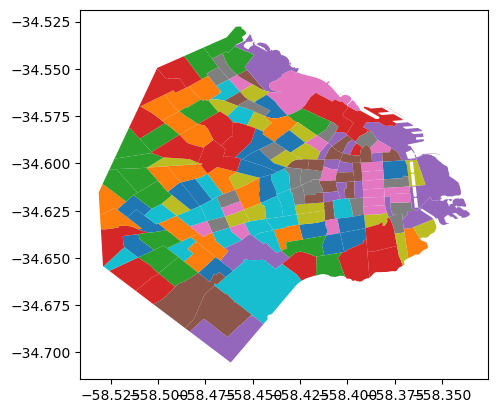

In [24]:
geo.plot(column="AREA")

<Axes: >

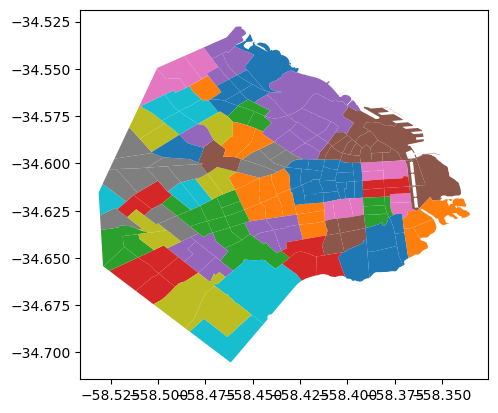

In [25]:
geo.plot(column="BARRIO")


<Axes: >

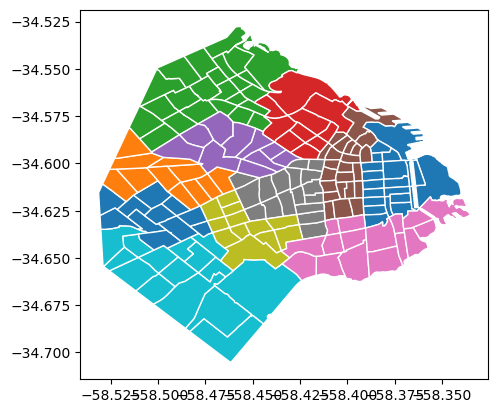

In [26]:
geo.plot(column="COMUNA", edgecolor = "white")


<Axes: >

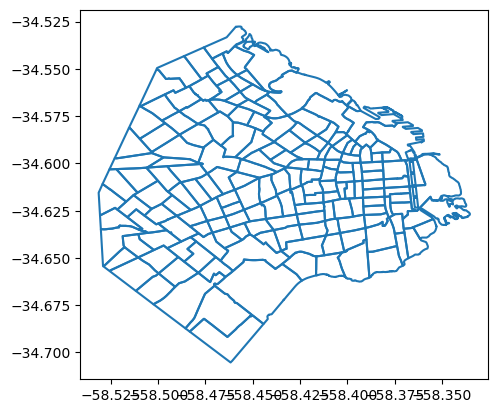

In [27]:
geo.boundary.plot()

In [28]:
geo [["COMUNA"]]

,COMUNA
0,1
1,1
2,1
3,1
4,1
...,...
162,4
163,8
164,8
165,10


In [29]:
geo.info ()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WKT         167 non-null    object  
 1   ID          167 non-null    object  
 2   CIRCUITO_N  167 non-null    object  
 3   COMUNA      167 non-null    object  
 4   BARRIO      167 non-null    object  
 5   TOTAL       167 non-null    object  
 6   MASCULINO   167 non-null    object  
 7   FEMENINO    167 non-null    object  
 8   PERIMETRO   167 non-null    object  
 9   AREA        167 non-null    object  
 10  geometry    167 non-null    geometry
dtypes: geometry(1), object(10)
memory usage: 14.5+ KB


In [50]:
#Como los resultados tienen referencias de comunas, vamos a transformar los 167 circuitos electorales a las 15 comunas
comunas_geometry = geo.dissolve(by='COMUNA', aggfunc='sum')

comunas_geometry = comunas_geometry.reset_index()

comunas_geometry

,COMUNA,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,1,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
1,10,"POLYGON ((-58.49486 -34.64467, -58.49496 -34.6...",MULTIPOLYGON (((-58.5216367948036 -34.62441597...,102103104105106107108109110112111,102103104105106107108109110112111,VERSALLESVILLA REALMONTE CASTROMONTE CASTROVIL...,12488.0000000000012898.0000000000011788.000000...,6159.000000000006409.000000000005696.000000000...,6329.000000000006489.000000000006092.000000000...,5650.121649130005071.212098420004716.075631930...,1407277.519140000001334764.207840000001049457....
2,11,"POLYGON ((-58.51695 -34.62022, -58.52102 -34.6...",MULTIPOLYGON (((-58.4779866630383 -34.62248007...,113114115116117118119120121122123,113114115116117118119120121122123,VILLA SANTA RITAVILLA SANTA RITAVILLA GRAL. MI...,12152.0000000000014866.0000000000012357.000000...,5845.000000000006945.000000000005962.000000000...,6307.000000000007921.000000000006395.000000000...,4542.725803940004542.767422630004206.813366860...,1070609.722589999901083337.84002000000915447.1...
3,12,"POLYGON ((-58.50978 -34.58697, -58.51458 -34.5...",MULTIPOLYGON (((-58.5097844637826 -34.58697438...,124125126127128129130131132133,124125126127128129130131132133,VILLA PUEYRREDONVILLA PUEYRREDONVILLA URQUIZAV...,16048.0000000000018747.0000000000016660.000000...,7607.000000000008955.000000000008131.000000000...,8441.000000000009792.000000000008529.000000000...,5428.702768580005165.189274250004895.745469120...,1737552.540749999901565359.827940000001391969....
4,13,"POLYGON ((-58.46735 -34.57251, -58.46809 -34.5...",MULTIPOLYGON (((-58.4552509221862 -34.53385674...,134135136137138139140141142143144145146147,134135136137138139140141142143144145146147,NUÃ‘EZNUÃ‘EZNUÃ‘EZNUÃ‘EZBELGRANOBELGRANOBELGRA...,8389.000000000009792.0000000000014638.00000000...,4120.000000000004779.000000000006797.000000000...,4269.000000000005013.000000000007841.000000000...,6144.477221950005049.314978940004018.350728930...,1595513.613990000001435842.99343000000703315.3...
5,14,"POLYGON ((-58.41600 -34.59786, -58.41895 -34.5...",MULTIPOLYGON (((-58.4425340254759 -34.56369026...,148149150151152153154155156157,148149150151152153154155156157,PALERMOPALERMOPALERMOPALERMOPALERMOPALERMOPALE...,21337.0000000000022672.0000000000013165.000000...,9753.0000000000010290.000000000006154.00000000...,11584.0000000000012382.000000000007011.0000000...,4826.2285797100016029.272596100008196.66982808...,1008574.947870000005331336.478360000102687803....
6,15,"POLYGON ((-58.44013 -34.60584, -58.44526 -34.6...",MULTIPOLYGON (((-58.4233636058363 -34.59775318...,158159160161162163164165166167,158159160161162163164165166167,VILLA CRESPOVILLA CRESPOVILLA CRESPOVILLA CRES...,19488.0000000000012238.0000000000023031.000000...,9140.000000000005857.0000000000010872.00000000...,10348.000000000006381.0000000000012159.0000000...,3878.318564570003384.287658960005113.706125690...,742959.55238200002690945.495524000031034522.12...
7,2,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
8,3,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MULTIPOLYGON (((-58.4125763504496 -34.60160088...,030031032033034035

<Axes: >

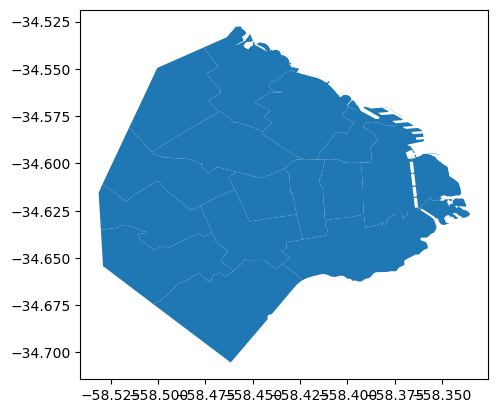

In [51]:
#Con las comunas ya agrupadas
comunas_geometry.plot()

In [52]:
# Agrega "Comuna" a cada valor en la columna 'Comuna'
comunas_geometry['COMUNA'] = 'Comuna ' + comunas_geometry['COMUNA'].astype(str).str.zfill(2)

comunas_geometry

,COMUNA,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,Comuna 01,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
1,Comuna 10,"POLYGON ((-58.49486 -34.64467, -58.49496 -34.6...",MULTIPOLYGON (((-58.5216367948036 -34.62441597...,102103104105106107108109110112111,102103104105106107108109110112111,VERSALLESVILLA REALMONTE CASTROMONTE CASTROVIL...,12488.0000000000012898.0000000000011788.000000...,6159.000000000006409.000000000005696.000000000...,6329.000000000006489.000000000006092.000000000...,5650.121649130005071.212098420004716.075631930...,1407277.519140000001334764.207840000001049457....
2,Comuna 11,"POLYGON ((-58.51695 -34.62022, -58.52102 -34.6...",MULTIPOLYGON (((-58.4779866630383 -34.62248007...,113114115116117118119120121122123,113114115116117118119120121122123,VILLA SANTA RITAVILLA SANTA RITAVILLA GRAL. MI...,12152.0000000000014866.0000000000012357.000000...,5845.000000000006945.000000000005962.000000000...,6307.000000000007921.000000000006395.000000000...,4542.725803940004542.767422630004206.813366860...,1070609.722589999901083337.84002000000915447.1...
3,Comuna 12,"POLYGON ((-58.50978 -34.58697, -58.51458 -34.5...",MULTIPOLYGON (((-58.5097844637826 -34.58697438...,124125126127128129130131132133,124125126127128129130131132133,VILLA PUEYRREDONVILLA PUEYRREDONVILLA URQUIZAV...,16048.0000000000018747.0000000000016660.000000...,7607.000000000008955.000000000008131.000000000...,8441.000000000009792.000000000008529.000000000...,5428.702768580005165.189274250004895.745469120...,1737552.540749999901565359.827940000001391969....
4,Comuna 13,"POLYGON ((-58.46735 -34.57251, -58.46809 -34.5...",MULTIPOLYGON (((-58.4552509221862 -34.53385674...,134135136137138139140141142143144145146147,134135136137138139140141142143144145146147,NUÃ‘EZNUÃ‘EZNUÃ‘EZNUÃ‘EZBELGRANOBELGRANOBELGRA...,8389.000000000009792.0000000000014638.00000000...,4120.000000000004779.000000000006797.000000000...,4269.000000000005013.000000000007841.000000000...,6144.477221950005049.314978940004018.350728930...,1595513.613990000001435842.99343000000703315.3...
5,Comuna 14,"POLYGON ((-58.41600 -34.59786, -58.41895 -34.5...",MULTIPOLYGON (((-58.4425340254759 -34.56369026...,148149150151152153154155156157,148149150151152153154155156157,PALERMOPALERMOPALERMOPALERMOPALERMOPALERMOPALE...,21337.0000000000022672.0000000000013165.000000...,9753.0000000000010290.000000000006154.00000000...,11584.0000000000012382.000000000007011.0000000...,4826.2285797100016029.272596100008196.66982808...,1008574.947870000005331336.478360000102687803....
6,Comuna 15,"POLYGON ((-58.44013 -34.60584, -58.44526 -34.6...",MULTIPOLYGON (((-58.4233636058363 -34.59775318...,158159160161162163164165166167,158159160161162163164165166167,VILLA CRESPOVILLA CRESPOVILLA CRESPOVILLA CRES...,19488.0000000000012238.0000000000023031.000000...,9140.000000000005857.0000000000010872.00000000...,10348.000000000006381.0000000000012159.0000000...,3878.318564570003384.287658960005113.706125690...,742959.55238200002690945.495524000031034522.12...
7,Comuna 02,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
8,Comuna 03,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MU

In [53]:
comunas_geometry = comunas_geometry.rename(columns={'COMUNA': 'seccion_nombre'})
comunas_geometry = comunas_geometry.sort_values(by="seccion_nombre")
comunas_geometry

,seccion_nombre,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,Comuna 01,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
7,Comuna 02,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
8,Comuna 03,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MULTIPOLYGON (((-58.4125763504496 -34.60160088...,030031032033034035036037038039040041042,30313233343536373839404142,BALVANERABALVANERABALVANERABALVANERABALVANERAB...,11737.0000000000014387.0000000000013128.000000...,5594.000000000006840.000000000006447.000000000...,6143.000000000007547.000000000006681.000000000...,2435.449887850002667.628718430002937.035241570...,372621.67427900003415581.46001400001433560.755...
9,Comuna 04,"POLYGON ((-58.38834 -34.66040, -58.38857 -34.6...",MULTIPOLYGON (((-58.3911717039239 -34.62725581...,043044045046047048049050051052053054055056057,434445464748495051525354555657,PARQUE PATRICIOSPARQUE PATRICIOSPARQUE PATRICI...,12645.000000000009017.000000000006626.00000000...,6221.000000000004308.000000000003338.000000000...,6424.000000000004709.000000000003288.000000000...,4240.118534610003034.380189830004035.948039670...,1048153.78007000000536442.185014000051041288.6...
10,Comuna 05,"POLYGON ((-58.41098 -34.63425, -58.41089 -34.6...",MULTIPOLYGON (((-58.4117786133578 -34.63035933...,058059060061062063064065066067,58596061626364656667,BOEDOBOEDOBOEDOALMAGROALMAGROALMAGROALMAGROALM...,13294.0000000000012152.0000000000014712.000000...,6609.000000000005906.000000000007016.000000000...,6685.000000000006246.000000000007696.000000000...,4205.282189820003853.156874380003839.806826920...,1051550.19280999990831900.92881700001724382.04...
11,Comuna 06,"POLYGON ((-58.45258 -34.62854, -58.45394 -34.6...",MULTIPOLYGON (((-58.4401348899609 -34.60583718...,068069070071072073074,68697071727374,CABALLITOCABALLITOCABALLITOCABALLITOCABALLITOC...,19160.0000000000028315.0000000000024308.000000...,8771.0000000000012610.0000000000011102.0000000...,10389.0000000000015705.0000000000013206.000000...,3960.783459640004370.533284610004288.632264930...,973593.82335500000958089.287436999961012942.90...
12,Comuna 07,"POLYGON ((-58.46507 -34.64473, -58.46511 -34.6...",MULTIPOLYGON (((-58.4388523166959 -34.63524254...,075076077078079080081082083084085086,757677787980818283848586,PARQUE CHACABUCOPARQUE CHACABUCOPARQUE CHACABU...,9742.0000000000014937.0000000000012762.0000000...,4565.000000000006978.000000000006325.000000000...,5177.000000000007959.000000000006437.000000000...,3862.812401330004141.240233580004934.942342140...,861842.52480400004923261.266608000031191250.85...
13,Comuna 08,"POLYGON ((-58.46081 -34.70436, -58.46093 -34.7...",MULTIPOLYGON (((-58.4500836139203 -34.65116549...,087088089090,87888990,VILLA SOLDATIVILLA RIACHUELOVILLA LUGANOVILLA ...,28726.0000000000015703.0000000000046140.000000...,14869.000000000008274.0000000000023699.0000000...,13857.000000000007429.0000000000022441.0000000...,12542.9950616000010602.8675450000010058.062239...,8660350.143179999704224142.280089999504524565....
14,Comuna 09,"MULTIPOLYGON (((-58.49193 -34.66618, -58.49216...",MULTIPOLYGON (((-58.4704405728115 -34.66427726...,091092093094095096097098099100

In [54]:
comunas = [f"Comuna {i:02d}" for i in range(1, 16)]
df_filtrado = resultados[(resultados["cargo_nombre"] == "PRESIDENTE Y VICE") & (resultados["seccion_nombre"].isin(comunas))]
df_agrupado = df_filtrado.groupby("seccion_nombre")["votos_cantidad"].sum().reset_index()
df_agrupado_partidos = df_filtrado.groupby(["seccion_nombre", "agrupacion_nombre"])["votos_cantidad"].sum().reset_index()
idx_partidos = df_agrupado_partidos.groupby("seccion_nombre")["votos_cantidad"].idxmax()
partidos_con_mas_votos = df_agrupado_partidos.loc[idx_partidos]
partidos_con_mas_votos

,seccion_nombre,agrupacion_nombre,votos_cantidad
2,Comuna 01,JUNTOS POR EL CAMBIO,45975
7,Comuna 02,JUNTOS POR EL CAMBIO,57022
12,Comuna 03,JUNTOS POR EL CAMBIO,39075
19,Comuna 04,UNION POR LA PATRIA,51401
22,Comuna 05,JUNTOS POR EL CAMBIO,43259
27,Comuna 06,JUNTOS POR EL CAMBIO,54873
32,Comuna 07,JUNTOS POR EL CAMBIO,48420
39,Comuna 08,UNION POR LA PATRIA,43136
44,Comuna 09,UNION POR LA PATRIA,39233
47,Comuna 10,JUNTOS POR EL CAMBIO,41986


In [57]:
#Toca mergear los dataframe de resultados y el mapa agrupado por comunas
df_mergeado = pd.merge(partidos_con_mas_votos, comunas_geometry, on='seccion_nombre', how='inner')
df_mergeado

,seccion_nombre,agrupacion_nombre,votos_cantidad,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,Comuna 01,JUNTOS POR EL CAMBIO,45975,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
1,Comuna 02,JUNTOS POR EL CAMBIO,57022,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
2,Comuna 03,JUNTOS POR EL CAMBIO,39075,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MULTIPOLYGON (((-58.4125763504496 -34.60160088...,030031032033034035036037038039040041042,30313233343536373839404142,BALVANERABALVANERABALVANERABALVANERABALVANERAB...,11737.0000000000014387.0000000000013128.000000...,5594.000000000006840.000000000006447.000000000...,6143.000000000007547.000000000006681.000000000...,2435.449887850002667.628718430002937.035241570...,372621.67427900003415581.46001400001433560.755...
3,Comuna 04,UNION POR LA PATRIA,51401,"POLYGON ((-58.38834 -34.66040, -58.38857 -34.6...",MULTIPOLYGON (((-58.3911717039239 -34.62725581...,043044045046047048049050051052053054055056057,434445464748495051525354555657,PARQUE PATRICIOSPARQUE PATRICIOSPARQUE PATRICI...,12645.000000000009017.000000000006626.00000000...,6221.000000000004308.000000000003338.000000000...,6424.000000000004709.000000000003288.000000000...,4240.118534610003034.380189830004035.948039670...,1048153.78007000000536442.185014000051041288.6...
4,Comuna 05,JUNTOS POR EL CAMBIO,43259,"POLYGON ((-58.41098 -34.63425, -58.41089 -34.6...",MULTIPOLYGON (((-58.4117786133578 -34.63035933...,058059060061062063064065066067,58596061626364656667,BOEDOBOEDOBOEDOALMAGROALMAGROALMAGROALMAGROALM...,13294.0000000000012152.0000000000014712.000000...,6609.000000000005906.000000000007016.000000000...,6685.000000000006246.000000000007696.000000000...,4205.282189820003853.156874380003839.806826920...,1051550.19280999990831900.92881700001724382.04...
5,Comuna 06,JUNTOS POR EL CAMBIO,54873,"POLYGON ((-58.45258 -34.62854, -58.45394 -34.6...",MULTIPOLYGON (((-58.4401348899609 -34.60583718...,068069070071072073074,68697071727374,CABALLITOCABALLITOCABALLITOCABALLITOCABALLITOC...,19160.0000000000028315.0000000000024308.000000...,8771.0000000000012610.0000000000011102.0000000...,10389.0000000000015705.0000000000013206.000000...,3960.783459640004370.533284610004288.632264930...,973593.82335500000958089.287436999961012942.90...
6,Comuna 07,JUNTOS POR EL CAMBIO,48420,"POLYGON ((-58.46507 -34.64473, -58.46511 -34.6...",MULTIPOLYGON (((-58.4388523166959 -34.63524254...,075076077078079080081082083084085086,757677787980818283848586,PARQUE CHACABUCOPARQUE CHACABUCOPARQUE CHACABU...,9742.0000000000014937.0000000000012762.0000000...,4565.000000000006978.000000000006325.000000000...,5177.000000000007959.000000000006437.000000000...,3862.812401330004141.240233580004934.942342140...,861842.52480400004923261.266608000031191250.85...
7,Comuna 08,UNION POR LA PATRIA,43136,"POLYGON ((-58.46081 -34.70436, -58.46093 -34.7...",MULTIPOLYGON (((-58.4500836139203 -34.65116549...,087088089090,87888990,VILLA SOLDATIVILLA RIACHUELOVILLA LUGANOVILLA ...,28726.0000000000015703.0000000000046140.000000...,14869.000000000008274.0000000000023699.0000000...,13857.000000000007429.0000000000022441.0000000...,12

Ahora que ya tenemos los data frames unidos podemos graficar que partido ganó por comuna.

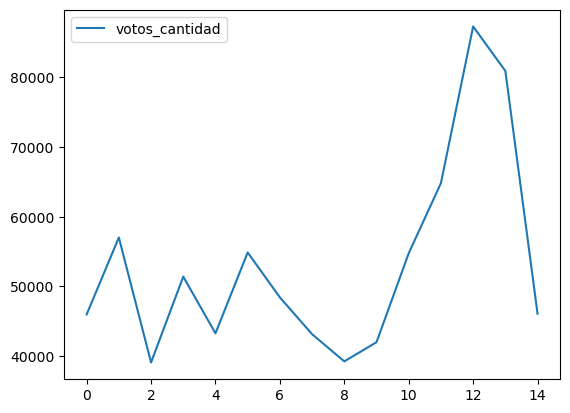

In [58]:
df_mergeado.plot()
plt.show()

In [71]:
# Creamos un geo a partir del df mergeado
gdf = gpd.GeoDataFrame(df_mergeado, geometry='geometry')

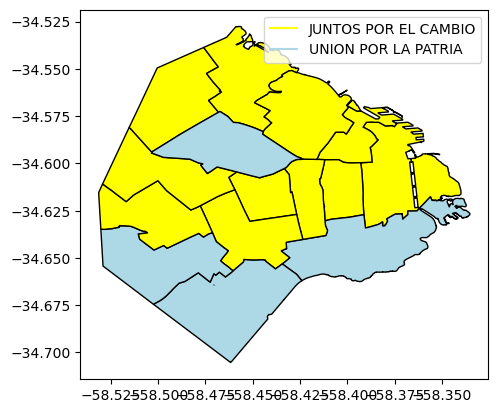

In [72]:
colores = {'JUNTOS POR EL CAMBIO': 'yellow', 'UNION POR LA PATRIA': 'lightblue'}

gdf['color'] = gdf['agrupacion_nombre'].map(colores)


ax = gdf.plot(color=gdf['color'], edgecolor='black', legend=True, legend_kwds={'loc': 'upper right'})


ax.plot([], [], color='yellow', label='JUNTOS POR EL CAMBIO')
ax.plot([], [], color='lightblue', label='UNION POR LA PATRIA')

ax.legend()

plt.show()

En este mapa podemos ver que UNION POR LA PATRIA ganó solo en 4 comunas: comuna 4, comuna 8, comuna 9 y comuna 15. las comunas incluyen lso barrios de La Boca, Barracas, Parque Patricios y Nueva Pompeya; Villa Lugano y Villa Riachuelo; Liniers, Mataderos y Parque Avellaneda y  Chacarita, Villa Crespo y La Paternal. En cambio, JUNTO POR EL CAMBIO ganó en las 11 restantes.

# CENSO

En relación a la integración de los datos del censo, no pudimos realizar una combinación directa entre los dos dataframes. Sin embargo, aplicamos una metodología alternativa para calcular el NSE (nivel socioeconómico) por comuna utilizando los datos del censo. Posteriormente, cruzamos esta información con los resultados electorales.

Para calcular el nivel socioecononico voy a usar la siguiente metodología. Tomando:

1. Número de hogares con computadora: Indica la cantidad de hogares que tienen al menos una computadora.

2. Porcentaje de menores de 18 años asistiendo a establecimientos educativos: Calculado como la proporción de menores de 18 años que asisten a algún establecimiento educativo respecto al total de menores de 18 años.

3. Porcentaje de habitantes mayores de 25 años con nivel universitario completo: Calculado como la proporción de habitantes mayores de 25 años con nivel universitario completo respecto al total de habitantes mayores de 25 años.

$IndiceComputadora = \frac{NúmeroDeHogaresConComputadora}{ConComputadora \cup ConHeladera \cup ConCelular \cup ConTeléfono}$

$IndiceEscolaridad = \frac{MenoresDe18Asisten}{MenoresDe18}$

$IndiceEducSuperior = \frac{MayoresDe25Universitarios}{MayoresDe25}$

PC1=0.76120783∗IndiceEducSup+0.10759338∗IndiceEscolaridad+0.63952037∗IndiceCompu

El PC1 arroja un rango de valores entre 0 y 1.32 (aproximadamente) se procede a una normalización para facilitar la lectura de los valores.

$NSE = \frac{PC1}{PC1Max} * 10$

De esta manera todos los valores del índice de NSE de radios censales se expresan en una escala del 0 al 10, donde 10 es el máximo valor de NSE alcanzado por el primer radio censal del ranking y 0 es el mínimo 

(fuente: https://gcba.github.io/tod/nota_metodologica#2-estimacion-del-nivel-socioeconomico-de-un-radio-censal)

(En relación a los datos del censo, hemos desarrollado una metodología detallada en el archivo llamado "CENSO 2.0". A continuación, presentamos los datos procesados, pero para obtener información completa sobre el proceso, se recomienda revisar dicho archivo.)

In [56]:
#cargar el df de resultados, filtrarlo para después hacer merge con el df de NSE.
partidos_con_mas_votos

,seccion_nombre,agrupacion_nombre,votos_cantidad
2,Comuna 01,JUNTOS POR EL CAMBIO,45975
7,Comuna 02,JUNTOS POR EL CAMBIO,57022
12,Comuna 03,JUNTOS POR EL CAMBIO,39075
19,Comuna 04,UNION POR LA PATRIA,51401
22,Comuna 05,JUNTOS POR EL CAMBIO,43259
27,Comuna 06,JUNTOS POR EL CAMBIO,54873
32,Comuna 07,JUNTOS POR EL CAMBIO,48420
39,Comuna 08,UNION POR LA PATRIA,43136
44,Comuna 09,UNION POR LA PATRIA,39233
47,Comuna 10,JUNTOS POR EL CAMBIO,41986


In [32]:
# Crear un DataFrame a partir de la lista de comunas y el NSE
nse_resultados = [2.64774129, 3.30260217, 2.72812078, 2.29991986, 2.80579369, 2.83694905, 2.82425392, 2.13634426, 2.43595075, 2.58963639, 2.6800347, 2.74851318, 2.8483856, 2.9288498, 2.73709952]
df_nse = pd.DataFrame({'Comuna': comunas, 'NSE': nse_resultados})
df_nse

,Comuna,NSE
0,Comuna 01,2.647741
1,Comuna 02,3.302602
2,Comuna 03,2.728121
3,Comuna 04,2.299920
4,Comuna 05,2.805794
5,Comuna 06,2.836949
6,Comuna 07,2.824254
7,Comuna 08,2.136344
8,Comuna 09,2.435951
9,Comuna 10,2.589636


In [33]:
df_final = pd.merge(df_agrupado_partidos, df_nse, left_on="seccion_nombre", right_on="Comuna", how="inner")
df_final

,seccion_nombre,agrupacion_nombre,votos_cantidad,Comuna,NSE
0,Comuna 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,3981,Comuna 01,2.647741
1,Comuna 01,HACEMOS POR NUESTRO PAIS,3230,Comuna 01,2.647741
2,Comuna 01,JUNTOS POR EL CAMBIO,45975,Comuna 01,2.647741
3,Comuna 01,LA LIBERTAD AVANZA,25657,Comuna 01,2.647741
4,Comuna 01,UNION POR LA PATRIA,38645,Comuna 01,2.647741
...,...,...,...,...,...
70,Comuna 15,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4760,Comuna 15,2.737100
71,Comuna 15,HACEMOS POR NUESTRO PAIS,3996,Comuna 15,2.737100
72,Comuna 15,JUNTOS POR EL CAMBIO,45464,Comuna 15,2.737100
73,Comuna 15,LA LIBERTAD AVANZA,21184,Comuna 15,2.737100


In [34]:
# Calculamos la correlación 
correlacion = df_final["NSE"].corr(df_final["votos_cantidad"])
print(f"Correlación entre NSE y cantidad de votos: {correlacion}")

Correlación entre NSE y cantidad de votos: 0.023484926428653415


La correlación de 0.023484926640144115 sugiere una conexión muy débil entre las variables. Sin embargo, es importante destacar que esta debilidad en la correlación no descarta por completo la posibilidad de que el NSE tenga alguna influencia en la cantidad de votos, o viceversa. Por lo tanto, continuaremos con el análisis para explorar más a fondo la relación entre estas variables.

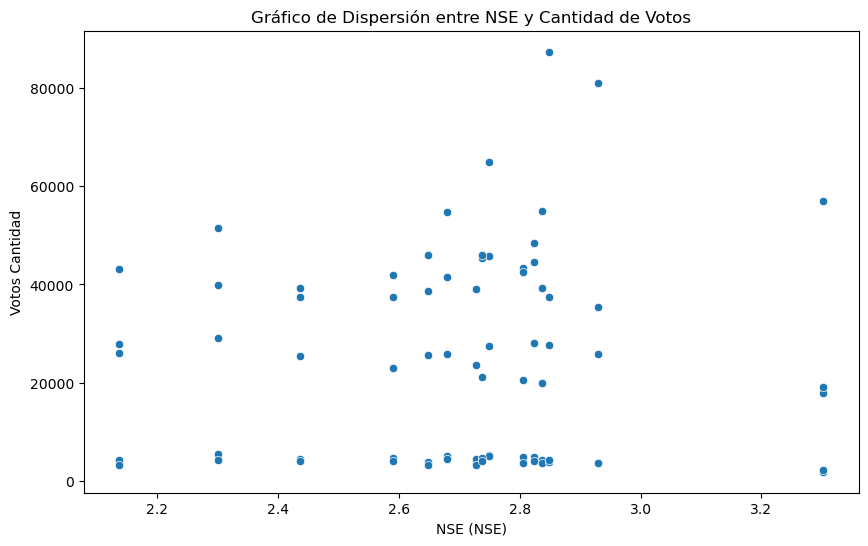

In [35]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="NSE", y="votos_cantidad", data=df_final)
plt.title("Gráfico de Dispersión entre NSE y Cantidad de Votos")
plt.xlabel("NSE (NSE)")
plt.ylabel("Votos Cantidad")
plt.show()

Con este grafico, vemos que la mayor cantidad de votos se concentró entre 2.4 y 3 de NSE. A continuación, en el histrograma se verá con mayor claridad.

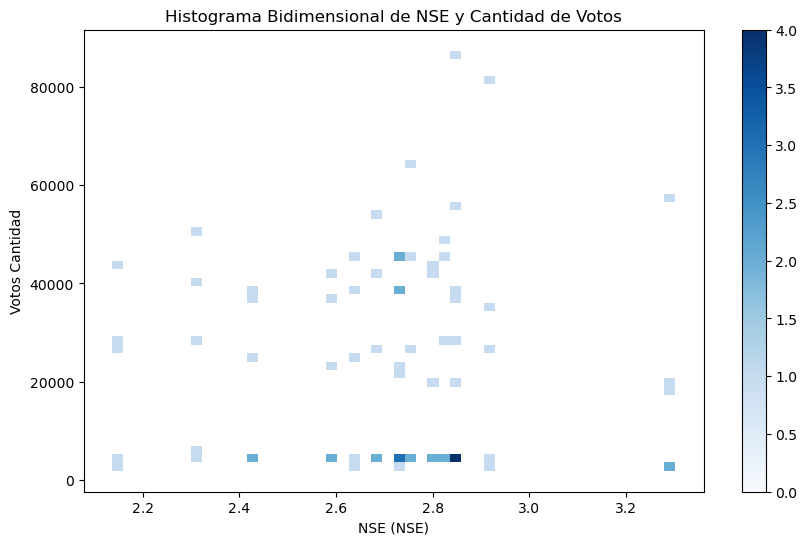

In [36]:
# Histograma bidemensional para mostar la densidad. 
plt.figure(figsize=(10, 6))
sns.histplot(x="NSE", y="votos_cantidad", data=df_final, bins=50, cmap="Blues", cbar=True)
plt.title("Histograma Bidimensional de NSE y Cantidad de Votos")
plt.xlabel("NSE (NSE)")
plt.ylabel("Votos Cantidad")
plt.show()

Ahora, para enfocarnos en el análisis de "Unión por la Patria", exploraremos la relación entre el NSE y la cantidad de votos para este partido específico.

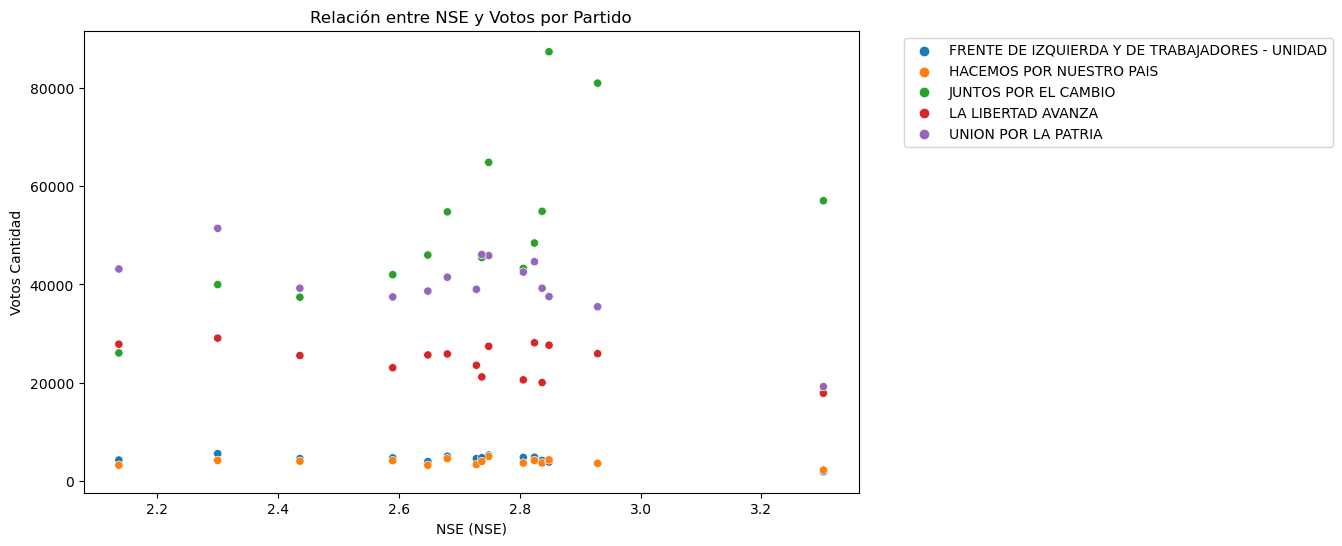

In [37]:
#distribución de votos por partido
plt.figure(figsize=(10, 6))
sns.scatterplot(x="NSE", y="votos_cantidad", hue="agrupacion_nombre", data=df_final)
plt.title("Relación entre NSE y Votos por Partido")
plt.xlabel("NSE (NSE)")
plt.ylabel("Votos Cantidad")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # para mover la leyenda fuera del gráfico
plt.show()

A partir de la observación del gráfico, se puede deducir que Juntos por el Cambio logró la mayor cantidad de votos en estratos socioeconómicos más elevados. En consecuencia, Unión por la Patria podría orientarse estratégicamente hacia la captación de votantes cuyos niveles socioeconómicos oscilen entre 2.4 y 2.8. Esta estrategía se respalda en la base de que los votos de La Libertad Avanza constituyen un núcleo duro, por lo que los esfuerzos estratégicos deberían centrarse en los votantes de Juntos por el Cambio, Hacemos por nuestro País y el FIT.

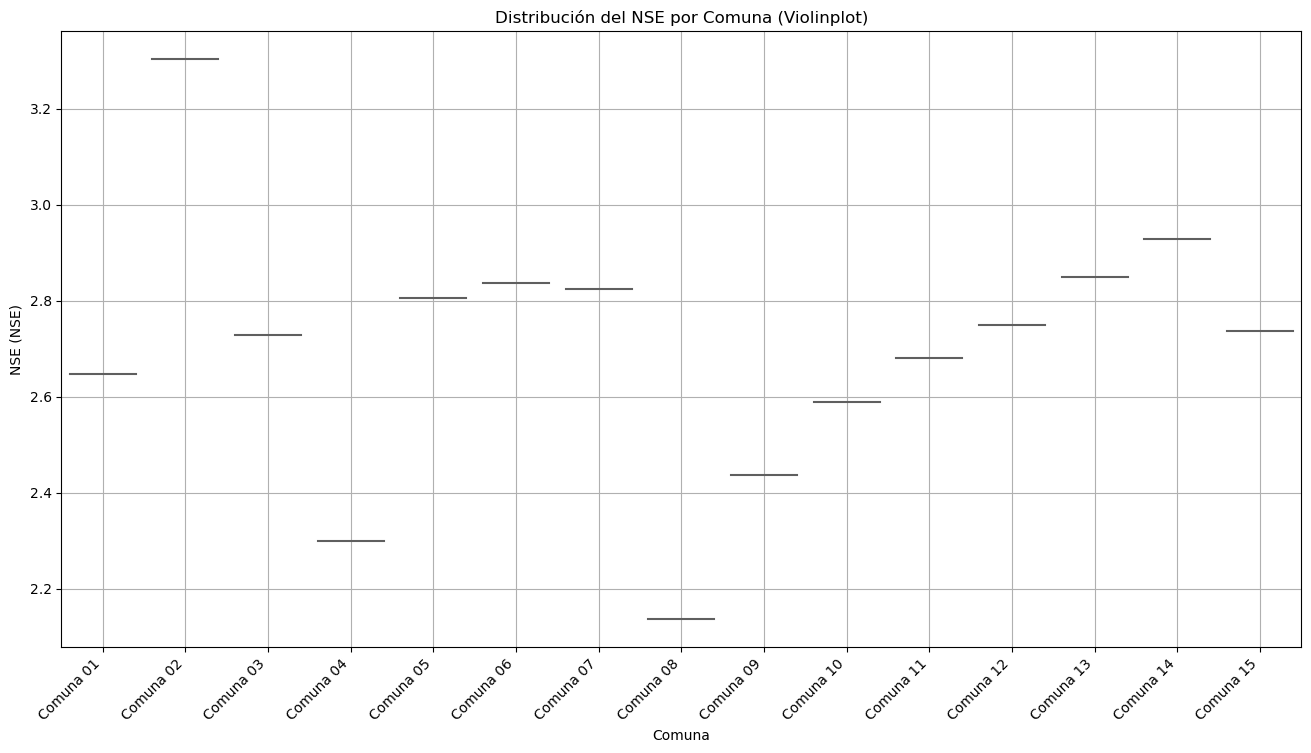

In [38]:
plt.figure(figsize=(16, 8))
sns.violinplot(x="seccion_nombre", y="NSE", data=df_final, palette="Set3")
plt.title("Distribución del NSE por Comuna (Violinplot)")
plt.xlabel("Comuna")
plt.ylabel("NSE (NSE)")
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.show()

A partir de este gráfico de violin plot, diseñado para visualizar la distribución de un conjunto de datos y ofrecer información sobre su forma, podemos inferir que las comunas donde Union por la Patria podría focalizar esfuerzos para mejorar su desempeño de cara al balotaje son las comunas 1, 3, 5, 9, 10, 11, 12 y 15. Estas comunas exhiben características en su distribución que sugieren oportunidades de optimización en el respaldo electoral.

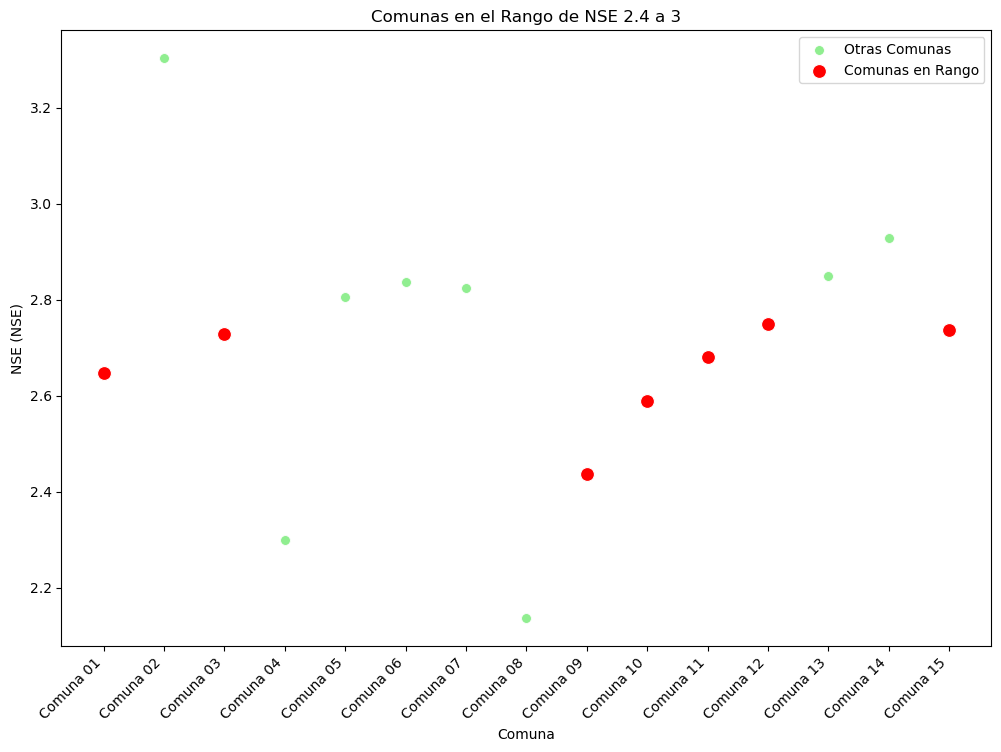

In [39]:
# Filtrar las comunas en el rango de NSE 2.4 a 2.8
comunas_rango_nse = df_final[(df_final["NSE"] >= 2.4) & (df_final["NSE"] <= 2.8)]

# Gráfico de puntos para mostrar las comunas en el rango de NSE 2.4 a 2.8
plt.figure(figsize=(12, 8))
sns.scatterplot(x="seccion_nombre", y="NSE", data=df_final, color="lightgreen", label="Otras Comunas", s=50)
sns.scatterplot(x="seccion_nombre", y="NSE", data=comunas_rango_nse, color="red", label="Comunas en Rango", s=100) #s es para el tamaño del punto
plt.title("Comunas en el Rango de NSE 2.4 a 3")
plt.xlabel("Comuna")
plt.ylabel("NSE (NSE)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

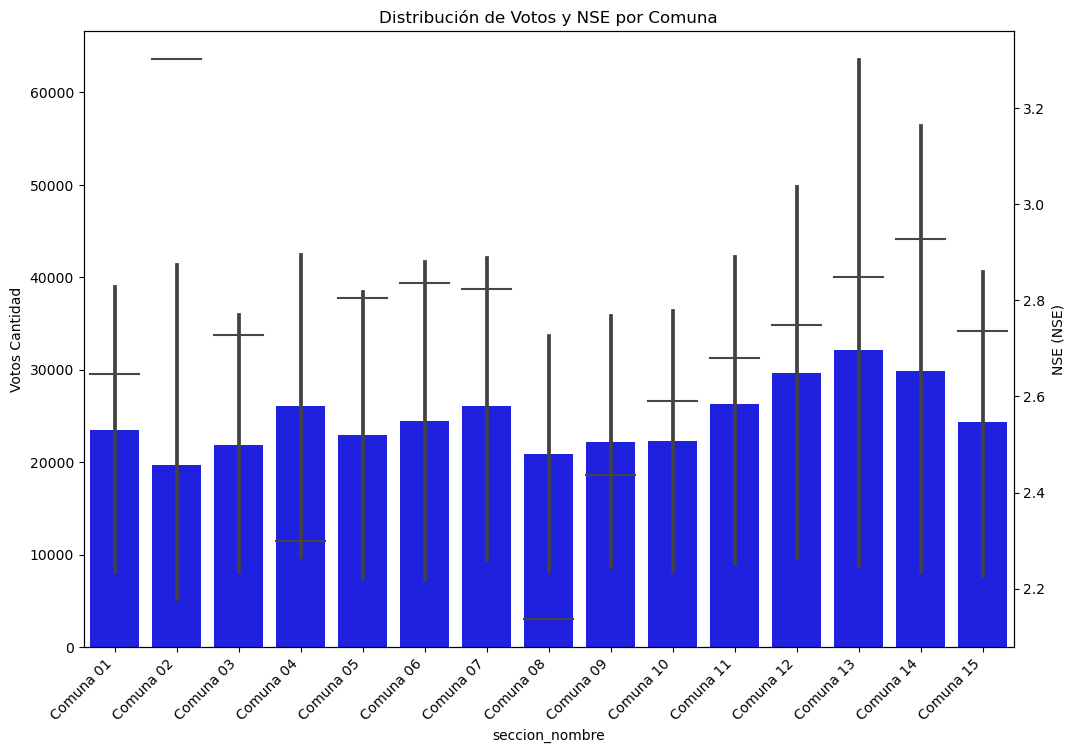

In [40]:
# Crear un gráfico combinado que reuna la distribucion de votos y NSE por comuna
plt.figure(figsize=(12, 8))
ax1 = plt.gca()  # Obtener el eje actual para votos_cantidad
ax2 = ax1.twinx()  # Crear un segundo eje y para Valor

# Graficar la distribución de votos por comuna en el primer eje y
sns.barplot(x="seccion_nombre", y="votos_cantidad", data=df_final, color='blue', ax=ax1)
ax1.set_ylabel('Votos Cantidad')

# Graficar la distribución del NSE por comuna en el segundo eje y
sns.violinplot(x="seccion_nombre", y="NSE", data=df_final, ax=ax2)
ax2.set_ylabel('NSE (NSE)')

# Rotar las etiquetas de las comunas a 45 grados para hacerlo más legible
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

plt.title("Distribución de Votos y NSE por Comuna")
plt.xlabel("Comuna")
plt.xticks(rotation=45, ha="right")
plt.show()

Para cacterizar al votante de Unión por la patria, podemos utilizar el NSE. Para ello, el siguiente grafico mostrara cual ess la media de NSE de los votos de UNION POR LA PATRIA.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7724\442924885.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="agrupacion_nombre", y="NSE", data=df_union_patria, ci=None, color="lightblue")


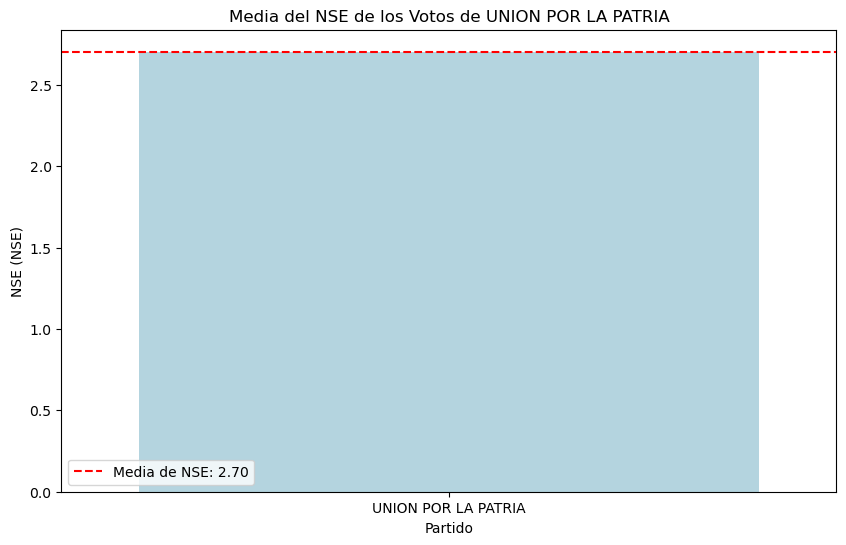

In [41]:
# Primero filtramos datos para UNION POR LA PATRIA
df_union_patria = df_final[df_final["agrupacion_nombre"] == "UNION POR LA PATRIA"]

# Calcular la media del NSE
media_nse = df_union_patria["NSE"].mean()

# Gráfico de barra con línea de media
plt.figure(figsize=(10, 6))
sns.barplot(x="agrupacion_nombre", y="NSE", data=df_union_patria, ci=None, color="lightblue")
plt.axhline(media_nse, color="red", linestyle="--", label=f'Media de NSE: {media_nse:.2f}')
plt.title("Media del NSE de los Votos de UNION POR LA PATRIA")
plt.xlabel("Partido")
plt.ylabel("NSE (NSE)")
plt.legend()
plt.show()
